#  **Deep Machine Learning Workshop 4**

# Task 1 (Classification of MNIST Data using **Low** level API)

# Machine Learning Steps


1.   Import and parse the dataset.
2.   Define Model
3.   Define loss function (Compile Model)
4.   Train Model (Fit Model)
5.   Evaulate Model (Optional Validation)   
6.   Test Model (Prediction using Trained model)


## Import Tensorflow , numpy and metasploit libraries

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt


2022-01-09 18:13:16.454997: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-09 18:13:16.455020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Define learning rate (how quickly it approches the optimum ) *lr

### Batch size number of training examples in one forward/backward propagation. The higher the batch size, the more memory space you'll need

### Steps (Number of times it takes to train the model 

In [4]:

numClasses = 10
numFeatures = 784

lr = 0.15
steps = 5000
batchSize = 256
iStep = 10



# Data

## 1. Seprating the data into Training and Testing Data 

## 2. Reshape data to feature size

## 3. Normalize the Data ( By Byte, Representing Each pixels with numbers between 1 and 0)
    This is adviced for easier and lesser memory and time consuming computation

In [5]:
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32)
xTrain, xTest = xTrain.reshape([-1,numFeatures]), xTest.reshape([-1,numFeatures])
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape, xTest.shape)

(60000, 784) (10000, 784)


## 1. Turn Train Data Into Slices and Shuffle 
### 2. initialize weights to 1 and bias to 0. weights will be updated during training
        This is the starting point for the optimization 

In [6]:

# Shuffle and Batch
trainData = tf.data.Dataset.from_tensor_slices((xTrain,yTrain))
trainData = trainData.repeat().shuffle(5000).batch(batchSize).prefetch(1)

# Weights
W = tf.Variable(tf.ones([numFeatures, numClasses]), name = "weights")
b = tf.Variable(tf.zeros([numClasses]), name = "bias" )

2022-01-09 18:13:22.316206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-09 18:13:22.316270: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-09 18:13:22.316326: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (olamide): /proc/driver/nvidia/version does not exist
2022-01-09 18:13:22.320973: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Model

### Define Activation Function (Softmax) :
* This is used in multiclass classifications, Stays At the end of the blackbox to classify to diffrent classes based on their probability . picks the the class with the highest probability

In [7]:
def network(x):
    return tf.nn.softmax(tf.matmul(x,W)+b)

# Loss

In [8]:
def crossEntropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=numClasses)
    y_pred = tf.clip_by_value(y_pred, 1e-9,1.)
    return tf.reduce_mean(tf.square(y_pred- y_true))
    #return tf.reduce_mean(-tf.reduce_sum(y_true*tf.math.log(y_pred),1))

# Metrics
    

### Defines Metrics for Accuracy 
    * Compares the predicted values with the actual values and take its mean

In [9]:
def accuracy(y_pred, y_true):
    correctedPred = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correctedPred, tf.float32))

# Training (Gradient)

### Training The Data By Running Updating the weights and bias using stocastic gradient descent
    * 1. Initializing a stochastic gradient descent optimizer with the learning rate declared earlier
    * 2. Predict with Softmax 
    * 3. Check the loss with crossEntropy function
    * 4. Generate gradient 
    * 5. update optimizer with the new gradient
    
    


In [10]:
optimizer = tf.optimizers.SGD(lr)
def runOptimization(x, y):
    #print(x.shape, y.shape)
    with tf.GradientTape() as g:
        pred = network(x)
        loss = crossEntropy(pred, y)

    gradients = g.gradient(loss, [W, b])
    # print(gradients)
    optimizer.apply_gradients(zip(gradients, [W, b]))
    return loss, pred

# Training Loop using Data

### Train Data
    1. Updates weight step times , and check accuracy every 10 times , while storing the losses
    
####  Feedforward Propagation
    The model optimize its weghts and bias by using this.first, the training data is run into the forward direction through the network. the next layer accepts the input data, processes through the softmax activation function and passes to the weight computed forward for optimization.
    
#### Backpropagation
    This is optimizing the weights and bias by using the error computed in the previous iteration , it uses the crossentropy function as the cost funtion, the gradient descent tells which direction to optimize the weight

In [11]:
lossac = []
for step, (batchX, batchY) in enumerate(trainData.take(steps),1):
    loss, pred = runOptimization(batchX, batchY)
    if step % iStep == 0:
        # pred = network(batchX)
        # loss = crossEntropy(pred, batchY)
        acc = accuracy(pred, batchY)
        print("step: %i, loss: %f, accuracy: %f" %(step,loss,acc))
        lossac.append(loss)   

step: 10, loss: 0.089424, accuracy: 0.589844
step: 20, loss: 0.088724, accuracy: 0.691406
step: 30, loss: 0.087948, accuracy: 0.683594
step: 40, loss: 0.087226, accuracy: 0.605469
step: 50, loss: 0.086303, accuracy: 0.617188
step: 60, loss: 0.085507, accuracy: 0.632812
step: 70, loss: 0.084361, accuracy: 0.625000
step: 80, loss: 0.083618, accuracy: 0.613281
step: 90, loss: 0.083098, accuracy: 0.632812
step: 100, loss: 0.081048, accuracy: 0.640625
step: 110, loss: 0.081423, accuracy: 0.632812
step: 120, loss: 0.079893, accuracy: 0.593750
step: 130, loss: 0.078920, accuracy: 0.609375
step: 140, loss: 0.076659, accuracy: 0.613281
step: 150, loss: 0.076303, accuracy: 0.640625
step: 160, loss: 0.075680, accuracy: 0.632812
step: 170, loss: 0.074265, accuracy: 0.632812
step: 180, loss: 0.071894, accuracy: 0.671875
step: 190, loss: 0.070008, accuracy: 0.726562
step: 200, loss: 0.071608, accuracy: 0.667969
step: 210, loss: 0.069475, accuracy: 0.660156
step: 220, loss: 0.068880, accuracy: 0.6562

step: 1800, loss: 0.023088, accuracy: 0.871094
step: 1810, loss: 0.028145, accuracy: 0.835938
step: 1820, loss: 0.026951, accuracy: 0.859375
step: 1830, loss: 0.026187, accuracy: 0.855469
step: 1840, loss: 0.022815, accuracy: 0.898438
step: 1850, loss: 0.024673, accuracy: 0.855469
step: 1860, loss: 0.021150, accuracy: 0.886719
step: 1870, loss: 0.022389, accuracy: 0.890625
step: 1880, loss: 0.019860, accuracy: 0.902344
step: 1890, loss: 0.022310, accuracy: 0.894531
step: 1900, loss: 0.021284, accuracy: 0.902344
step: 1910, loss: 0.024146, accuracy: 0.847656
step: 1920, loss: 0.024154, accuracy: 0.871094
step: 1930, loss: 0.023442, accuracy: 0.878906
step: 1940, loss: 0.021578, accuracy: 0.894531
step: 1950, loss: 0.024121, accuracy: 0.878906
step: 1960, loss: 0.024536, accuracy: 0.882812
step: 1970, loss: 0.023149, accuracy: 0.867188
step: 1980, loss: 0.024430, accuracy: 0.855469
step: 1990, loss: 0.027363, accuracy: 0.839844
step: 2000, loss: 0.024874, accuracy: 0.867188
step: 2010, l

step: 3590, loss: 0.018658, accuracy: 0.875000
step: 3600, loss: 0.020578, accuracy: 0.886719
step: 3610, loss: 0.020380, accuracy: 0.855469
step: 3620, loss: 0.017532, accuracy: 0.906250
step: 3630, loss: 0.019322, accuracy: 0.863281
step: 3640, loss: 0.016876, accuracy: 0.917969
step: 3650, loss: 0.019413, accuracy: 0.894531
step: 3660, loss: 0.017087, accuracy: 0.914062
step: 3670, loss: 0.016489, accuracy: 0.906250
step: 3680, loss: 0.022068, accuracy: 0.875000
step: 3690, loss: 0.021615, accuracy: 0.886719
step: 3700, loss: 0.022469, accuracy: 0.851562
step: 3710, loss: 0.019051, accuracy: 0.898438
step: 3720, loss: 0.021807, accuracy: 0.863281
step: 3730, loss: 0.017134, accuracy: 0.910156
step: 3740, loss: 0.018900, accuracy: 0.902344
step: 3750, loss: 0.016945, accuracy: 0.914062
step: 3760, loss: 0.017612, accuracy: 0.890625
step: 3770, loss: 0.015693, accuracy: 0.902344
step: 3780, loss: 0.018700, accuracy: 0.894531
step: 3790, loss: 0.018655, accuracy: 0.898438
step: 3800, l

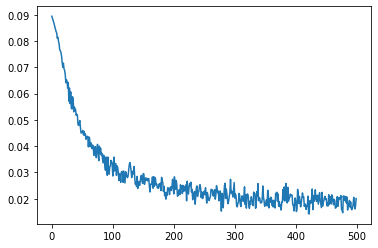

In [12]:
plt.plot(lossac)

# Test (Prediction)

In [13]:
predY = network(xTest)
classLabel = tf.argmax(predY, 1)


# Reshape the flatten images

In [14]:
xTestImg = np.reshape(xTest, [-1,28,28])

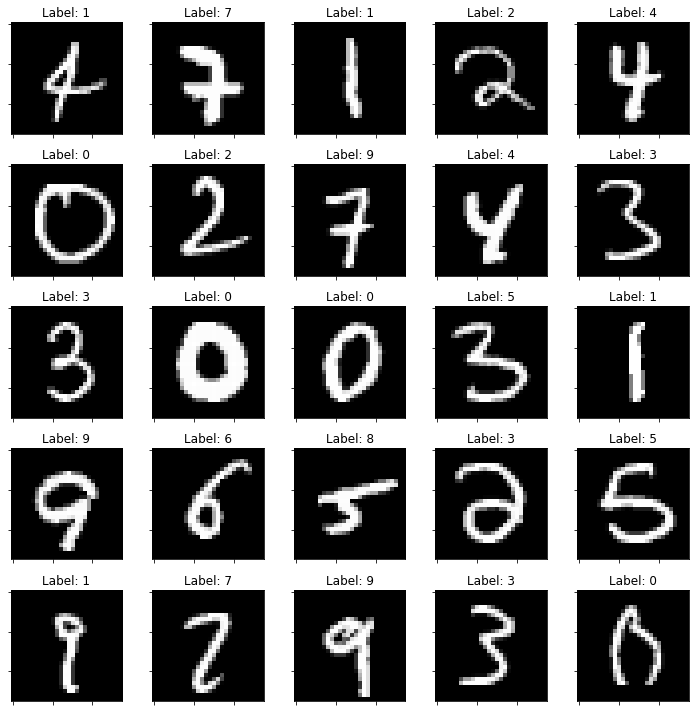

In [15]:
startIndex = 300
num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(25):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(xTestImg[i+startIndex,:,:], cmap='gray')
    ax.set_title('Label: {}'.format(classLabel[i+startIndex]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)    
    

plt.tight_layout()

plt.show()

#  **Deep Machine Learning Workshop 4**

# Task 2 

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy import asarray
import time
from numpy import argmax
from tensorflow.keras.utils import plot_model

In [17]:
numClasses = 10
numFeatures = 784

lr = 0.15
steps = 5000
batchSize = 256
iStep = 10

## Data Processing 
### Splits and normalizes data before training

In [19]:
# MNIST data
(xTrain, yTrain),(xTest, yTest) = mnist.load_data()
xTrain, xTest = np.array(xTrain, np.float32), np.array(xTest, np.float32)
xTrain, xTest = xTrain.reshape([-1,numFeatures]), xTest.reshape([-1,numFeatures])
xTrain, xTest = xTrain/255., xTest/255.
print(xTrain.shape, xTest.shape)

(60000, 784) (10000, 784)


## Building MODEL 

expects an output data of 10 classes and uses a softmax activation fuction for the last layer


In [20]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
Total params: 8,028
Trainable params: 8,028
Non-trainable params: 0
_________________________________________________________________


In [42]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.872


###  Hidden Neuron Set to 30

In [21]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 dense_4 (Dense)             (None, 30)                330       
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 8,490
Trainable params: 8,490
Non-trainable params: 0
_________________________________________________________________


#### Accuracy increases , also the processing time increases

In [24]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.895
Processing Time:  8.71819519996643


### Hidden Neuron Set To 512

In [44]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                7850      
                                                                 
 dense_25 (Dense)            (None, 512)               5632      
                                                                 
 dense_26 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,612
Trainable params: 18,612
Non-trainable params: 0
_________________________________________________________________


#### processing time increases  , also a futher improvement in accuracy

In [45]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.930
Processing Time:  10.995627880096436


### Tune Learning Rate

In [47]:
model = Sequential()
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 30)                23550     
                                                                 
 dense_31 (Dense)            (None, 8)                 248       
                                                                 
 dense_32 (Dense)            (None, 10)                90        
                                                                 
Total params: 23,888
Trainable params: 23,888
Non-trainable params: 0
_________________________________________________________________


### Learning Rate Set to 0.1

In [48]:
from keras import backend as K
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 0.1)

#### There is a reduction in accuracy ( the descent must have overshot)
#### Reduction in time it takes to train 

In [49]:

#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.113
Processing Time:  8.890690803527832


### Learning Rate Set To 1


In [50]:
model = Sequential()
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 30)                23550     
                                                                 
 dense_34 (Dense)            (None, 8)                 248       
                                                                 
 dense_35 (Dense)            (None, 10)                90        
                                                                 
Total params: 23,888
Trainable params: 23,888
Non-trainable params: 0
_________________________________________________________________


#### Accuracy reduces futher and processing time reduces

In [51]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 1)
# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.098
Processing Time:  7.964528799057007


### Learning Rate Set To 3

In [52]:
model = Sequential()
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                23550     
                                                                 
 dense_37 (Dense)            (None, 8)                 248       
                                                                 
 dense_38 (Dense)            (None, 10)                90        
                                                                 
Total params: 23,888
Trainable params: 23,888
Non-trainable params: 0
_________________________________________________________________


#### Model behavees very poorly but its very quick to train

In [53]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, 3)
# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.101
Processing Time:  9.768633365631104


### Model With and Without regularizer

* With regularizer

In [58]:
model = Sequential()
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 30)                23550     
                                                                 
 dense_46 (Dense)            (None, 8)                 248       
                                                                 
 dense_47 (Dense)            (None, 10)                90        
                                                                 
Total params: 23,888
Trainable params: 23,888
Non-trainable params: 0
_________________________________________________________________


### Has higher processing time and lesser accuracy compared to withouth regularizer

In [59]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.888
Processing Time:  9.95652174949646


* Without regularizer

In [56]:
model = Sequential()
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 30)                23550     
                                                                 
 dense_43 (Dense)            (None, 8)                 248       
                                                                 
 dense_44 (Dense)            (None, 10)                90        
                                                                 
Total params: 23,888
Trainable params: 23,888
Non-trainable params: 0
_________________________________________________________________


In [57]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.960
Processing Time:  9.594746589660645


### Add DropOut

In [8]:
from keras.layers import Dropout

In [64]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                7850      
                                                                 
 dense_49 (Dense)            (None, 8)                 88        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_50 (Dense)            (None, 10)                90        
                                                                 
Total params: 8,028
Trainable params: 8,028
Non-trainable params: 0
_________________________________________________________________


#### Accuracy reduces a little

In [65]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.870
Processing Time:  8.730173587799072


### Best Possible HyperParameters

#### learning rate = 0.001
#### number of hidden layer = 512
#### With regularizer 
#### Adding Dropout to reduce overfitting

In [72]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(numFeatures,), kernel_regularizer='l1'))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(numClasses, activation='softmax'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 10)                7850      
                                                                 
 dense_55 (Dense)            (None, 512)               5632      
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_56 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,612
Trainable params: 18,612
Non-trainable params: 0
_________________________________________________________________


In [73]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
#timing the model performance
tic = time.time()
model.fit(xTrain, yTrain, epochs=10, batch_size=128, verbose=0)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(xTest, yTest, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Accuracy: 0.923
Processing Time:  13.120967149734497


In [75]:
print(K.eval(model.optimizer.lr))

0.001


In [76]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

## APPLY MLP TO CLASSIFY CIFAR10 IMAGES

### Imports

In [32]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [34]:
test_labels.shape

(10000, 1)

In [35]:

x_train = np.reshape(train_images, (50000, 3072)).astype('float32')
x_test = np.reshape(test_images, (10000, 3072)).astype('float32')

In [36]:
model = Sequential()
model.add(Dense(10, activation='relu',  input_dim=3072))
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                30730     
                                                                 
 dense_18 (Dense)            (None, 512)               5632      
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 41,492
Trainable params: 41,492
Non-trainable params: 0
_________________________________________________________________


In [37]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
#timing the model performance
tic = time.time()
model.fit(x_train, train_labels,  epochs=18, batch_size=32, verbose=2)
toc = time.time()
# evaluate the model
execution_time = toc-tic
loss, acc = model.evaluate(x_test, test_labels, verbose=0)
print('Accuracy: %.3f' % acc)
print('Processing Time: ', execution_time)
    
        #Run model and get results to append on a list
        
        

Epoch 1/18
1563/1563 - 4s - loss: 2.3043 - accuracy: 0.0979 - 4s/epoch - 3ms/step
Epoch 2/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0999 - 3s/epoch - 2ms/step
Epoch 3/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0987 - 3s/epoch - 2ms/step
Epoch 4/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0979 - 3s/epoch - 2ms/step
Epoch 5/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0976 - 3s/epoch - 2ms/step
Epoch 6/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0977 - 3s/epoch - 2ms/step
Epoch 7/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.1005 - 3s/epoch - 2ms/step
Epoch 8/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0965 - 3s/epoch - 2ms/step
Epoch 9/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0998 - 3s/epoch - 2ms/step
Epoch 10/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0976 - 3s/epoch - 2ms/step
Epoch 11/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0978 - 3s/epoch - 2ms/step
Epoch 12/18
1563/1563 - 3s - loss: 2.3028 - accuracy: 0.0979 - 3s/epoch - 2ms/step
Epoch 13/18
1